In [1]:
### Solving Math equations using numpy& scipy

In [2]:
# linear algebra (2 equations & 2 unknowns)
import numpy as np

# image we have the following 2 algebraic equations
#  z  + 2y = 1
#  4z + 5y = 1

A = np.array([[1,2], [4,5]]) # the left hand side: z & y
b = np.array([1,1])          # the right hand side:

# the following will solve Ax = b in a least-squares sense (if an exact solution doesn't exist)\n
# note that this is usually what A\b does in matlab

# if function returns a bunch of stuff, and you don't care about the stuff, use a _
x, _ , _, _ = np.linalg.lstsq(A,b)
print('result[z, y]: ', x)
print('error: Ax - b = ',  A @ x-b)

# even for very large system
AA = np.random.randn(100, 100)
bb = np.random.randn(100)

xx, _, _, _ = np.linalg.lstsq(AA, bb)
print('sum(AAxx - bb) = ', np.sum(AA @ xx -bb)) # very small value means good-fit

result[z, y]:  [-1.  1.]
error: Ax - b =  [-2.22044605e-16  8.88178420e-16]
sum(AAxx - bb) =  -2.0249345819914333e-13


C:\Users\Alex\AppData\Local\Temp\ipykernel_15944\2685439143.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, _ , _, _ = np.linalg.lstsq(A,b)
C:\Users\Alex\AppData\Local\Temp\ipykernel_15944\2685439143.py:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  xx, _, _, _ = np.linalg.lstsq(AA, bb)


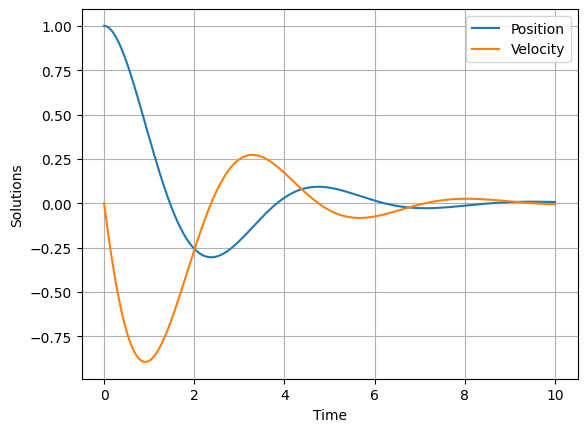

In [3]:
# ordinary differential equations (ODE)
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

TSpan = [0, 10] # initial time and final time
t = np.linspace(0, 10, 1000)
X_initial = [1,0] # initial conditions

# solve_ivp wants a true function with arguments -- good time to show how to do that:\
# define a function that takes t and X0 as arguments, and returns
def ode_test(x, X0):
    X = np.zeros(2)
    lam = 2
    zeta = 1
    X[0] = X0[1]
    X[1] = - lam * X0[0] - zeta * X0[1]
    return X

# Now that we have defined a function that we want to call, solve the ODE
# Calls the function ode_test at each time step and solves for new state
# given initial state then repeats at every time step.
ode_test_solution = solve_ivp(ode_test, TSpan, X_initial, t_eval=t)
T_out = t
Y_out = ode_test_solution.y.T # transpose the solution for indexing later

plt.figure()
plt.plot(T_out, Y_out)
# plt.plot(T_out, Y_out[:,0])
plt.xlabel('Time')
plt.ylabel('Solutions')
plt.legend((['Position', 'Velocity']))
plt.grid(True)
plt.show()

